# Working with Pandas, Matplotlib, Seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1

### 1.1

In [2]:
df = pd.read_csv('task1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [8]:
df['sex'].replace('male', 1, inplace=True) #male = 1
df['sex'].replace('female', 0, inplace=True)

C:\Users\Avatar\AppData\Local\Temp\ipykernel_9012\145311873.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].replace('male', 1, inplace=True) #male = 1
C:\Users\Avatar\AppData\Local\Temp\ipykernel_9012\145311873.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

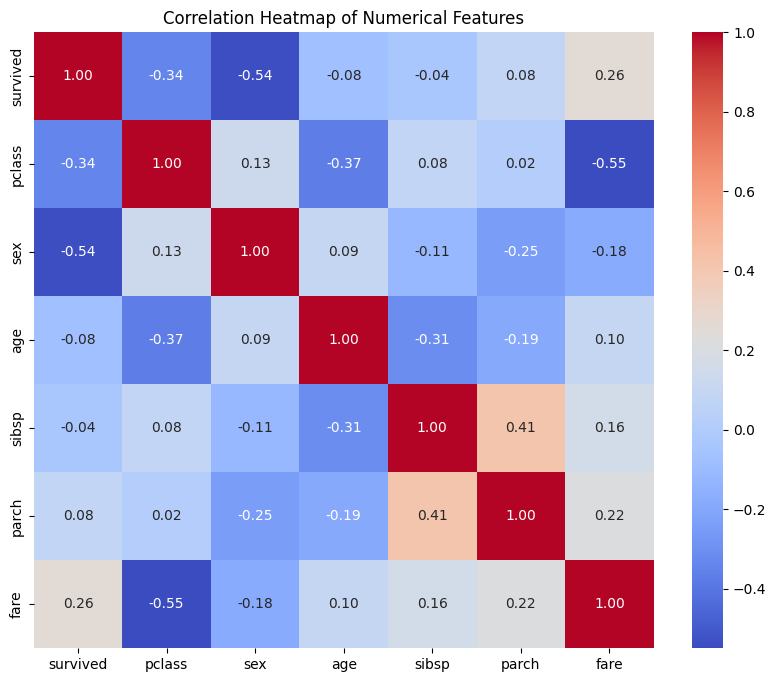

In [9]:
#select only the numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64'])

#compute the correlation matrix
correlation_matrix = numerical_features.corr()

#Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [10]:
print(df['survived'].value_counts()[1])

342


In [23]:
#age_sex = df[["age", "sex"]]
filter_age_sex = df[df["age"] > 30]
filter_age_sex = filter_age_sex[filter_age_sex["sex"] == 0]
filter_age_sex

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
11,1,1,0,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
15,1,2,0,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
18,0,3,0,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,0,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
865,1,2,0,42.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,yes,True
871,1,1,0,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
879,1,1,0,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False


In [40]:
filter_emb_fare = df[df["fare"] > 100]
filter_emb_fare = filter_emb_fare[(filter_emb_fare['embark_town'] == 'Cherbourg') | (filter_emb_fare['embarked'] == 'C')]
filter_emb_fare

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
31,1,1,0,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
118,0,1,1,24.0,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False
195,1,1,0,58.0,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
215,1,1,0,31.0,1,0,113.2750,C,First,woman,False,D,Cherbourg,yes,False
258,1,1,0,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
299,1,1,0,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False
306,1,1,0,NaN,0,0,110.8833,C,First,woman,False,NaN,Cherbourg,yes,True
307,1,1,0,17.0,1,0,108.9000,C,First,woman,False,C,Cherbourg,yes,False
311,1,1,0,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
319,1,1,0,40.0,1,1,134.5000,C,First,woman,False,E,Cherbourg,yes,False


In [49]:
columns_with_missing_values = df.columns[df.isnull().any()]
print(columns_with_missing_values)
print("\n")
#print(df.isnull().any())
missing_values = df.isnull().sum()
print(missing_values)

Index(['age', 'embarked', 'deck', 'embark_town'], dtype='object')


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


### Age 
Since age is a numerical feature, we can impute the missing values with the mean or median age of passengers

In [50]:
#Impute missing values for 'age' with the median age
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

C:\Users\Avatar\AppData\Local\Temp\ipykernel_9012\2084798164.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age, inplace=True)


### Embarked and Embark_town: 
Both columns represent the port of embarkation, and there are only a few missing values. We can impute these missing values with the most common port of embarkation or also we can completely remove these rows since the number of missing values is small compared to the size of the dataset.

In [51]:
#Impute missing values for 'embarked' and 'embark_town' with the most common value
most_common_embarked = df['embarked'].mode()[0]
most_common_embark_town = df['embark_town'].mode()[0]
df['embarked'].fillna(most_common_embarked, inplace=True)
df['embark_town'].fillna(most_common_embark_town, inplace=True)

C:\Users\Avatar\AppData\Local\Temp\ipykernel_9012\4047855028.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(most_common_embarked, inplace=True)
C:\Users\Avatar\AppData\Local\Temp\ipykernel_9012\4047855028.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.